In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [82]:
from plot_config import *

In [2]:
particle_path = '/sciserver/filedb08-01/ocean/wenrui_temp/particle_file/saltyM/'
# particle_path = '/sciserver/filedb11-01/ocean/wenrui_temp/particle_file/holliday/'
table_path = particle_path+'table/'
map_path = particle_path+'maps/'
maps = xr.open_zarr(map_path)
table= xr.open_zarr(table_path)

In [4]:
import os 
for i in range(1,9):
    os.listdir(f'/sciserver/filedb0{i}-02/')
big_ecco = xr.open_mfdataset('/sciserver/filedb0*-02/ocean/poseidon/daily_mean_ecco/zarr/mean*', engine = 'zarr')
ecco_grid = xr.open_zarr('~/ECCO_transport')
xc = np.array(ecco_grid.XC)
yc = np.array(ecco_grid.YC)
ds = ecco_grid

In [77]:
# salty_idate = 5479

In [79]:
table['time'] = big_ecco.time[salty_idate:salty_idate-len(table.time):-1]

In [8]:
time = '2007-01'
smean = xr.open_zarr('~/centerS_mean.zarr')

In [9]:
xrange = (-35,-0)
yrange = (47,65)
zrange = (-200,0)

lon_bool = np.logical_and(ds.XC[2]>xrange[0],ds.XC[2]<xrange[1])
lat_bool = np.logical_and(ds.YC[2]>yrange[0],ds.YC[2]<yrange[1])
dep_bool = np.logical_and(ds.Z>zrange[0],ds.Z<zrange[1])
pos_bool = np.logical_and(np.logical_and(lon_bool,lat_bool),dep_bool)

sp = big_ecco.SALT.sel(time = time)[0] - smean.smean
those = np.logical_and(sp[:,2]>0.1,pos_bool)
iz, iy, ix = (xr.DataArray(i,dims = 'stupid') for i in np.where(those))

TOTAL_VOLUME = float((those*ecco_grid.drF*ecco_grid.rA[2]).sum().values)
NUMBER_OF_PARTICLE = len(table.space)
VOLUME_EACH = TOTAL_VOLUME/NUMBER_OF_PARTICLE

In [13]:
ts = table.sum(dim = 'space').persist()

In [15]:
ts

<xarray.Dataset>
Dimensions:  (time: 3650)
Dimensions without coordinates: time
Data variables: (12/13)
    A        (time) float64 dask.array<chunksize=(58,), meta=np.ndarray>
    E        (time) float64 dask.array<chunksize=(58,), meta=np.ndarray>
    F        (time) float64 dask.array<chunksize=(58,), meta=np.ndarray>
    I        (time) float64 dask.array<chunksize=(58,), meta=np.ndarray>
    dep      (time) float64 dask.array<chunksize=(58,), meta=np.ndarray>
    dif_h    (time) float64 dask.array<chunksize=(58,), meta=np.ndarray>
    ...       ...
    e_ua     (time) float64 dask.array<chunksize=(58,), meta=np.ndarray>
    lat      (time) float64 dask.array<chunksize=(58,), meta=np.ndarray>
    lhs      (time) float64 dask.array<chunksize=(58,), meta=np.ndarray>
    lon      (time) float64 dask.array<chunksize=(58,), meta=np.ndarray>
    sf       (time) float64 dask.array<chunksize=(58,), meta=np.ndarray>
    sl       (time) float64 dask.array<chunksize=(58,), meta=np.ndarray>

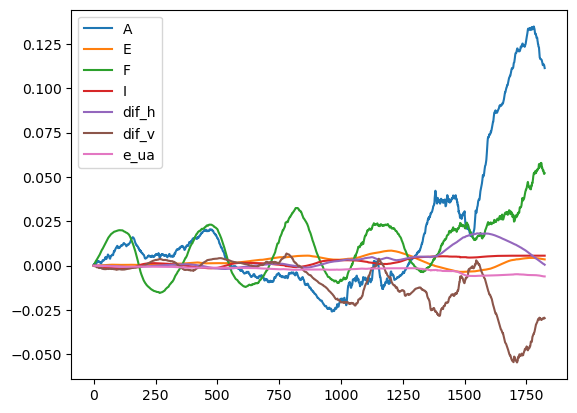

In [40]:
for var in ts.data_vars:
    if var not in ['dep','lat','lon','sl','sf','lhs']:
        plt.plot(-np.cumsum(ts[var][1824::-1])/NUMBER_OF_PARTICLE,label = var)
plt.legend()

In [28]:
final = table.sum(dim = 'time').persist()


KeyboardInterrupt



In [36]:
time_slice = slice(1824,None,-1)

In [44]:
cum = table.isel(time = time_slice).cumsum(dim = 'time')

In [45]:
%%time
cum = cum.persist()

CPU times: user 15min 53s, sys: 11min 26s, total: 27min 20s
Wall time: 33min 27s


In [56]:
np.std(cum['F'][-1]).values/np.sqrt(NUMBER_OF_PARTICLE-1)

0.0007777013835632255

In [88]:
np.std(cum['A'][-1]).values/np.sqrt(NUMBER_OF_PARTICLE-1)

0.0008887845289275249

In [ ]:
%%time
ax = plt.axes()
handles = []
labels = []
for var in rhs_list:
    print(var)
    common = np.sqrt(NUMBER_OF_PARTICLE-1)
    a_mean = -cum[var].mean(dim = 'space')
    a_std = 10*cum[var].std(dim = 'space')/common
    mean_line, = ax.plot(table.time[time_slice], a_mean, label=term_dic[var], color=color_dic[var])
    spread_area = ax.fill_between(table.time[time_slice], a_mean - a_std, a_mean + a_std, alpha=0.3, label=term_dic[var], color=color_dic[var])
    handles.append((mean_line, spread_area))
    labels.append(term_dic[var])
cum['tot'] = (cum['A']+cum['e_ua']+cum['E']+cum['dif_h']+cum['dif_v']+cum['I']+cum['F'])
tot_mean = -cum['tot'].mean(dim = 'space').persist()

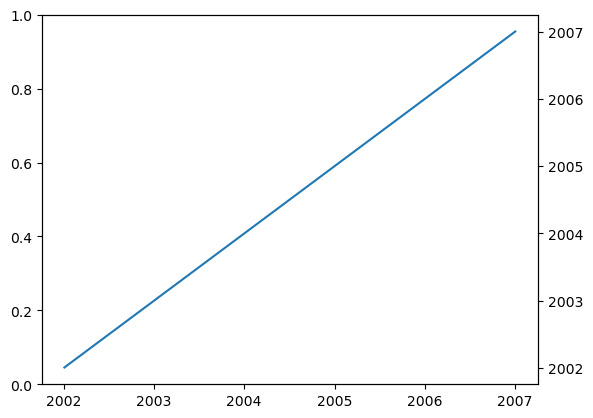

In [110]:
ax = plt.axes()
ax2 = ax.twinx()
ax2.plot(table.time[time_slice],table.time[time_slice])
offset = float(table.sf.isel(time = 1824).mean(dim = 'space'))
# plt.legend(handles,labels)

In [97]:
cum['tot'] = (cum['A']+cum['e_ua']+cum['E']+cum['dif_h']+cum['dif_v']+cum['I']+cum['F']).persist()

ERROR! Session/line number was not unique in database. History logging moved to new session 1565


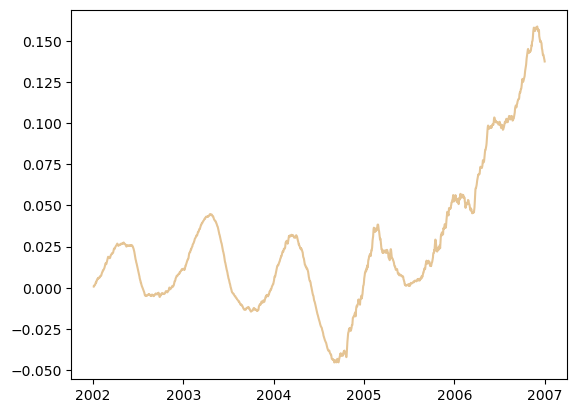

In [98]:
a_mean = -cum['tot'].mean(dim = 'space')
mean_line, = plt.plot(table.time[time_slice], a_mean, label=term_dic[var], color=color_dic[var])


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x7f72041e9c60> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

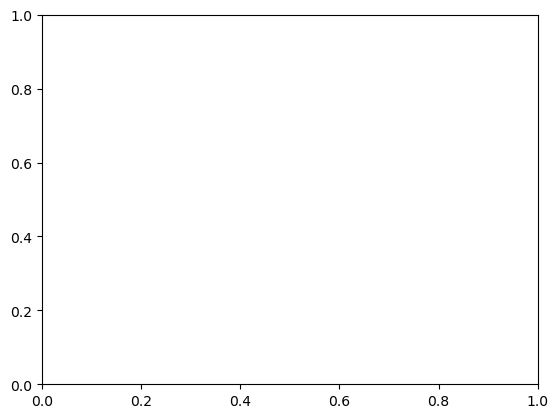

In [106]:
plt.plot(table.time[time_slice],table.sl[time_slice].mean(dim = 'space'),color = 'k')

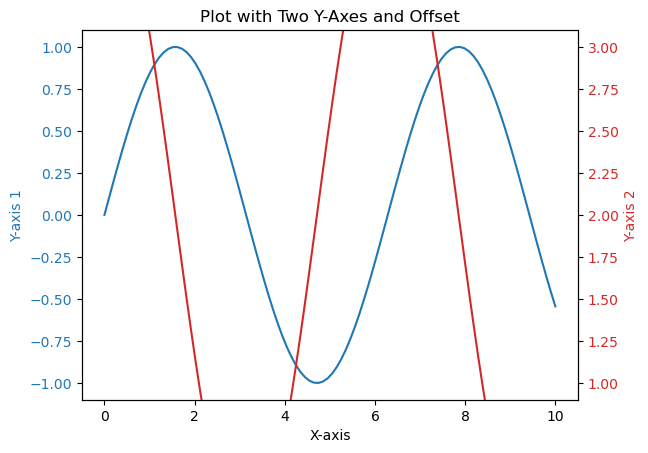

In [108]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = 2*np.cos(x) + 2  # Offset by 2 units

# Create the first plot with the left y-axis
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis 1', color=color)
ax1.plot(x, y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create the second plot with the right y-axis (twinned with the first axis)
ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('Y-axis 2', color=color)
ax2.plot(x, y2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Set the limits and ticks for the second y-axis to reflect the offset
offset = 2
ax2.set_ylim(ax1.get_ylim()[0] + offset, ax1.get_ylim()[1] + offset)
# ax2.set_yticks(ax1.get_yticks() + offset)
# ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda val, pos: f'{val - offset:.2f}'))

# Add a title
plt.title('Plot with Two Y-Axes and Offset')

# Show the plot
plt.show()